In [2]:
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa
import sklearn
import random as rn
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, TimeDistributed, Dropout, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU, LSTM, Flatten, RepeatVector, Permute, Multiply, Conv2D, MaxPooling2D

In [138]:
file_path = './data/종결어미/'
file_names = os.listdir(file_path)
len(file_names)

1612

In [139]:
file_path = './data/종결어미X//'
file_names = os.listdir(file_path)
len(file_names)

1594

In [3]:
import wave
import contextlib
time_list = []
file_path = './data/종결어미/'
file_names = os.listdir(file_path)
for fname in file_names :
    with contextlib.closing(wave.open(file_path+fname,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
    duration = frames / float(rate)
    print(duration)
    time_list.append(duration)

0.9754375
1.4210625
1.153
1.024
0.64
0.64
1.024
1.024
1.28
0.64
1.024
0.896
1.552625
0.768
1.152
1.152
0.64
0.768
0.896
0.64
1.1011875
0.768
0.768
1.6213125
1.024
0.768
0.768
0.896
1.408
0.64
1.024
1.152
1.664
0.64
1.0106875
1.024
0.913
0.896
0.768
1.408
1.024
1.024
0.768
0.896
0.64
1.024
1.28
1.024
1.024
1.28
0.384
1.024
0.896
0.896
0.896
1.152
1.024
0.896
1.152
0.896
1.024
0.512
0.768
0.64
0.64
0.64
1.3385625
1.024
1.5438125
0.8539375
0.64
0.512
0.768
0.896
0.768
1.024
0.768
0.896
0.896
0.768
0.768
1.024
0.768
1.152
0.768
1.4741875
1.024
1.152
0.896
1.2989375
1.024
0.896
0.768
0.896
0.512
0.64
1.152
0.64
0.64
0.896
1.3808125
0.768
0.768
1.024
1.152
0.768
0.64
0.896
0.768
1.024
0.896
1.564375
0.965125
0.64
1.024
1.024
0.64
1.024
0.768
1.024
0.512
0.896
0.768
1.152
0.64
0.64
0.512
0.64
0.768
0.896
0.896
0.896
0.768
0.64
1.28
1.024
0.896
0.768
0.512
0.896
1.0573125
0.896
1.024
1.152
0.768
1.28
0.768
1.536
1.024
1.024
0.896
0.896
0.64
1.408
0.768
0.896
1.024
0.9121875
0.896
0.9388125
1.4

0.768
1.0283125
0.802125
0.672125
0.64
0.902125
0.97775
0.683875
0.8195625
0.585
0.64
0.786875
1.3763125
0.9095
1.024
0.64
0.64
0.64
0.512
1.024
0.88925
1.024
1.0030625
0.9675625
0.7869375
0.8805625
0.64
0.7520625
1.664
1.0203125
1.152
0.896
1.054125
0.768
0.760625
0.512
0.8896875
0.8415625
0.6910625
0.771125
0.768
0.896
1.0091875
0.768
0.7575
1.000375
0.84725
0.859125
0.768
0.64
0.768
0.956375
0.7028125
0.8925
0.9578125
1.362625
0.9609375
0.9560625
0.6949375
0.7450625
0.6384375
0.64
0.64
0.64
0.72875
0.768
0.768
0.6446875
0.768
0.896
0.768
0.8899375
0.896
0.512
1.152
0.64
1.1154375
1.06475
1.024
1.024
0.64
0.768
0.64
0.768
0.68275
0.978375
0.6961875
0.8975625
0.4636875
0.5665
1.05075
0.9640625
1.024
0.64
0.896
0.512
0.768
0.768
0.720875
0.656125
0.55325
0.8683125
0.5149375
0.896
0.7760625
0.666375
1.152
0.869
0.64
1.152
0.965625
0.64
0.6524375
0.8170625
1.1845
0.6264375
0.8756875
1.49125
1.024
0.598
0.761
0.527875
0.8935
0.512
0.648875
0.854125
0.8891875
1.024
1.024
0.744
0.6770625
0.

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, fl

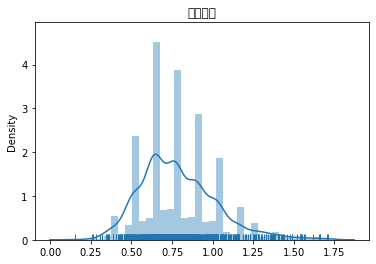

In [4]:
import seaborn as sns
sns.distplot(time_list, kde=True, rug=True)
plt.title("종결어미")
plt.show()

In [142]:
time_list = []
file_path = './data/종결어미X/'
file_names = os.listdir(file_path)
for fname in file_names :
    with contextlib.closing(wave.open(file_path+fname,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
    duration = frames / float(rate)
    print(duration)
    time_list.append(duration)

0.512
0.512
0.64
0.64
0.512
0.512
0.512
0.768
0.768
0.384
0.64
0.512
0.768
0.768
0.896
0.64
0.512
0.512
0.512
0.512
0.512
0.512
0.384
0.512
0.768
0.512
1.024
0.64
0.768
0.64
1.28
0.512
0.896
0.768
0.512
1.024
0.768
0.768
0.896
0.896
0.768
0.896
0.512
0.64
1.024
0.64
0.64
1.152
0.512
0.64
0.64
1.024
0.768
0.768
0.64
0.64
0.896
0.384
0.896
0.768
1.024
0.512
0.896
0.64
0.64
0.896
0.64
0.768
0.64
1.024
0.768
0.768
1.28
0.64
0.64
0.384
0.64
0.384
0.64
0.384
0.384
0.384
1.024
0.64
0.768
0.512
0.512
1.024
1.024
0.512
0.384
0.768
0.512
0.384
1.152
0.64
0.768
0.896
0.384
0.512
0.512
1.024
0.896
1.024
0.768
0.64
0.64
0.896
0.768
0.896
0.768
0.896
0.896
0.512
1.024
0.64
0.64
0.896
0.768
0.768
0.896
1.408
0.768
0.64
0.896
0.768
0.64
0.64
0.512
0.896
0.896
0.64
0.896
0.768
0.768
0.768
0.512
0.384
0.64
0.512
0.64
0.64
0.768
0.896
0.512
0.768
0.768
1.664
0.512
0.384
1.024
0.384
0.512
0.896
0.896
0.896
0.896
0.64
1.024
0.64
0.768
1.024
0.768
0.768
0.64
0.512
0.896
0.64
0.64
0.512
1.024
0.64
0.896
0.64

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, fl

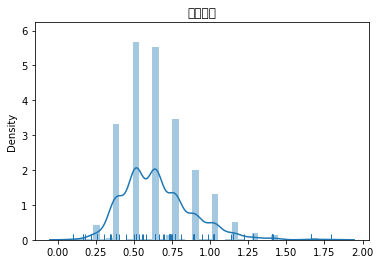

In [143]:
sns.distplot(time_list, kde=True, rug=True)
plt.title("종결어미")
plt.show()

In [17]:
file_path+fname

'./data/종결어미/40대_여성_종결어미_355.wav'

In [148]:
with contextlib.closing(wave.open('data/ebs한국사.wav','r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)
    print(duration)

2924.3907482993195


In [19]:
audio_file =file_path+fname
audio, sr = librosa.load(audio_file, sr=16000)
print('sr:', sr, ', audio shape:', audio.shape)
print('length:', audio.shape[0]/float(sr), 'secs')

sr: 16000 , audio shape: (9370,)
length: 0.585625 secs


In [20]:
mfcc = librosa.feature.mfcc(audio, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)

In [21]:
mfcc.shape

(100, 59)

In [22]:
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [23]:
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
padded_mfcc = pad2d(mfcc, 100)

In [24]:
mfcc.shape

(100, 59)

In [25]:
padded_mfcc.shape

(100, 100)

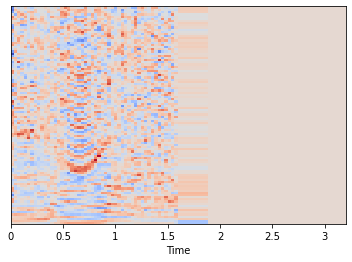

In [26]:
import librosa.display
librosa.display.specshow(padded_mfcc, sr=16000, x_axis='time')

In [27]:
dataset=[]
for filename in os.listdir('./data/종결어미/'):
    audio, sr = librosa.load('./data/종결어미/'+ filename, sr=16000)
    if len(audio)  > 16000 :
        audio = audio[-16000:]
    mfcc = librosa.feature.mfcc(audio, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)
    mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
    padded_mfcc = pad2d(mfcc, 100)
    dataset.append((padded_mfcc, 1))
for filename in os.listdir('./data/종결어미X/'):
    audio, sr = librosa.load('./data/종결어미X/'+ filename, sr=16000)
    if len(audio)  > 16000 :
        audio = audio[-16000:]
    mfcc = librosa.feature.mfcc(audio, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)
    mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
    padded_mfcc = pad2d(mfcc, 100)
    dataset.append((padded_mfcc, 0))



C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packag

In [28]:
len(dataset)

3206

In [29]:
import pandas as pd

In [30]:
import random 

In [31]:
random.shuffle(dataset)

In [32]:
data_mfccs = [a for (a,b,) in dataset]
data_y = [b for (a,b,) in dataset]

In [33]:
data_mfccs = np.array(data_mfccs)
data_y = to_categorical(np.array(data_y))


In [34]:
data_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [35]:
data_mfccs.shape

(3206, 100, 100)

In [36]:
data_X_ex = np.expand_dims(data_mfccs, -1)

In [37]:
train_X_ex=data_X_ex[:2564]
test_X_ex=data_X_ex[2564:]
train_y=data_y[:2564]
test_y=data_y[2564:]

In [38]:
train_X_ex[0].shape

(100, 100, 1)

In [39]:
ip = Input(shape=train_X_ex[0].shape)

m = Conv2D(32, kernel_size=(4,4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4,4))(m)

m = Flatten()(m)

m = Dense(64, activation='relu')(m)

m = Dense(32, activation='relu')(m)

op = Dense(2, activation='softmax')(m)

model = Model(ip, op)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 96)        1632      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 96)        0         
_________________________________________________________________
flatten (Flatten)            (None, 55296)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                3539008   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66    

In [40]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [41]:
history = model.fit(train_X_ex,train_y,
                   epochs=30,
                   validation_split=0.2)

Train on 2051 samples, validate on 513 samples
Epoch 1/30
2051/2051 [==============================] - 4s 2ms/sample - loss: 0.7779 - accuracy: 0.6397 - val_loss: 0.5515 - val_accuracy: 0.7602
Epoch 2/30
2051/2051 [==============================] - 1s 353us/sample - loss: 0.4397 - accuracy: 0.7991 - val_loss: 0.5077 - val_accuracy: 0.7778
Epoch 3/30
2051/2051 [==============================] - 1s 351us/sample - loss: 0.3806 - accuracy: 0.8372 - val_loss: 0.4000 - val_accuracy: 0.8460
Epoch 4/30
2051/2051 [==============================] - 1s 357us/sample - loss: 0.3137 - accuracy: 0.8659 - val_loss: 0.5373 - val_accuracy: 0.7817
Epoch 5/30
2051/2051 [==============================] - 1s 360us/sample - loss: 0.3360 - accuracy: 0.8654 - val_loss: 0.4413 - val_accuracy: 0.8148
Epoch 6/30
2051/2051 [==============================] - 1s 356us/sample - loss: 0.2373 - accuracy: 0.9093 - val_loss: 0.7898 - val_accuracy: 0.6920
Epoch 7/30
2051/2051 [==============================] - 1s 358us/sa

In [42]:
model.evaluate(test_X_ex,test_y)

642/642 [==============================] - 0s 227us/sample - loss: 0.7496 - accuracy: 0.8427


[0.7495660661049536, 0.84267914]

In [178]:
model.save("my_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_model\assets


In [179]:
model.save("my_h5_model.h5")

In [234]:
Y_pred =model.predict(test_X_ex)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_pred_classes

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,

In [235]:
Y_true = np.argmax(test_y,axis = 1) 

In [236]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_true, Y_pred_classes)
print(conf_mat)

[[253  60]
 [ 59 270]]


In [168]:
test_y[0]

array([1., 0.], dtype=float32)

In [ ]:
from tensorflow.keras.applications import VGG16
import numpy as np

In [ ]:
vgg16_model = VGG16(input_shape=(100,50,3),
                   include_top = False,weights='imagenet')

In [ ]:
for layer in vgg16_model.layers :
    if layer.name == 'block5_conv3' :
        layer.trainable = True # 학습 가능
    else : 
        layer.trainable = False # 학습불가능

In [ ]:
len(train_X_ex)

In [ ]:
train_X_ex[0].shape

In [ ]:
train_X_ex_3ch=train_X_ex.reshape(2564,100,50,3)
test_X_ex_3ch=test_X_ex.reshape(642,100,50,3)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
cnn_model = Sequential()
cnn_model.add(vgg16_model)
cnn_model.add(Flatten())
cnn_model.add(Dense(64,activation='relu'))
cnn_model.add(Dense(32,activation='relu'))
cnn_model.add(Dense(2,activation='softmax'))

cnn_model.summary()

In [ ]:
cnn_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(train_X_ex_3ch,train_y,
                   epochs=20,
                   validation_split=0.2)

In [47]:
import IPython
import speech_recognition as sr
from pydub import AudioSegment
import subprocess
import os
import csv
import numpy as np
import pandas as pd
from tqdm import tqdm

In [337]:
recognizer = sr.Recognizer()
recognizer.energy_threshold = 300

youtube_audio = sr.AudioFile("data/000129.wav")

import pydub
audio_seg= AudioSegment.from_wav('./data/000129.wav')
total_in_ms= len(audio_seg)

Text_list = []
with youtube_audio as source:
    s_audio = recognizer.record(source)
    Text_list.append(recognizer.recognize_google(audio_data=s_audio, language="ko-KR",show_all=True))
# for i in tqdm(range (1,int(total_in_ms/1000/30)+1)) :
#     with youtube_audio as source:
#         s_audio = recognizer.record(source,offset = i*30,duration=30)
#     Text_list.append(recognizer.recognize_google(audio_data=s_audio, language="ko-KR",show_all=True))

AttributeError: 'int' object has no attribute 'Recognizer'

In [44]:
from pydub.silence import detect_nonsilent

C:\Users\SMHRD\Anaconda3\envs\Deep_GPU2021\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [ ]:
min_silence_length = 70
intervals = detect_nonsilent("./data/[한국사능력검정] 설민석 – 10분 순삭! 한 번에 정리되는 일제강점기!.wav", min_silence_len=min_silence_length, silence_thresh=0)

In [ ]:
intervals

In [48]:
time_list = []
audio_file = './data/youtube2.wav'
def match_target_amplitude(sound, target_dBFS):
    change_in_dBFS = target_dBFS - sound.dBFS
    return sound.apply_gain(change_in_dBFS)
#Convert wav to audio_segment
audio_segment = AudioSegment.from_wav(audio_file)
#normalize audio_segment to -20dBFS 
normalized_sound = match_target_amplitude(audio_segment, -20.0)
print("length of audio_segment={} seconds".format(len(normalized_sound)/1000))
#Print detected non-silent chunks, which in out case would be spoken words.
nonsilent_data = detect_nonsilent(normalized_sound, min_silence_len=70, silence_thresh=-32.64, seek_step=1)
#convert ms to seconds
print("start,Stop")
for chunks in nonsilent_data:
    time_list.append([chunk/1000 for chunk in chunks])

length of audio_segment=1100.533 seconds
start,Stop


In [66]:
time_list = []
audio_file = './data/ebs_pu22im01nl01t002.wav'
def match_target_amplitude(sound, target_dBFS):
    change_in_dBFS = target_dBFS - sound.dBFS
    return sound.apply_gain(change_in_dBFS)
#Convert wav to audio_segment
audio_segment = AudioSegment.from_wav(audio_file)
#normalize audio_segment to -20dBFS 
normalized_sound = match_target_amplitude(audio_segment, -20.0)
print("length of audio_segment={} seconds".format(len(normalized_sound)/1000))
#Print detected non-silent chunks, which in out case would be spoken words.
nonsilent_data = detect_nonsilent(normalized_sound, min_silence_len=70, silence_thresh=-32.64, seek_step=1)
#convert ms to seconds
print("start,Stop")
for chunks in nonsilent_data:
    time_list.append([chunk/1000 for chunk in chunks])

length of audio_segment=2339.782 seconds
start,Stop


In [90]:
time_list = []
audio_file = './data/ebs한국사.wav'
def match_target_amplitude(sound, target_dBFS):
    change_in_dBFS = target_dBFS - sound.dBFS
    return sound.apply_gain(change_in_dBFS)
#Convert wav to audio_segment
audio_segment = AudioSegment.from_wav(audio_file)
#normalize audio_segment to -20dBFS 
normalized_sound = match_target_amplitude(audio_segment, -20.0)
print("length of audio_segment={} seconds".format(len(normalized_sound)/1000))
#Print detected non-silent chunks, which in out case would be spoken words.
nonsilent_data = detect_nonsilent(normalized_sound, min_silence_len=70, silence_thresh=-32.64, seek_step=1)
#convert ms to seconds
print("start,Stop")
for chunks in nonsilent_data:
    time_list.append([chunk/1000 for chunk in chunks])

length of audio_segment=2924.391 seconds
start,Stop


In [380]:
time_list = []
audio_file = './data/study.wav'
def match_target_amplitude(sound, target_dBFS):
    change_in_dBFS = target_dBFS - sound.dBFS
    return sound.apply_gain(change_in_dBFS)
#Convert wav to audio_segment
audio_segment = AudioSegment.from_wav(audio_file)
#normalize audio_segment to -20dBFS 
normalized_sound = match_target_amplitude(audio_segment, -20.0)
print("length of audio_segment={} seconds".format(len(normalized_sound)/1000))
#Print detected non-silent chunks, which in out case would be spoken words.
nonsilent_data = detect_nonsilent(normalized_sound, min_silence_len=70, silence_thresh=-32.64, seek_step=1)
#convert ms to seconds
for data in nonsilent_data :
    print(data)

length of audio_segment=383.501 seconds


KeyboardInterrupt: 

In [49]:
time_list

[[0.0, 0.05],
 [0.345, 0.382],
 [0.474, 0.521],
 [0.975, 2.114],
 [2.187, 2.274],
 [2.741, 3.067],
 [3.153, 3.498],
 [3.642, 3.812],
 [3.957, 4.49],
 [4.582, 4.618],
 [4.761, 4.975],
 [5.137, 5.58],
 [5.892, 5.9],
 [7.275, 7.986],
 [8.296, 8.773],
 [8.882, 11.65],
 [11.898, 12.089],
 [12.478, 12.499],
 [12.942, 12.972],
 [13.095, 13.103],
 [13.246, 14.493],
 [14.593, 16.149],
 [16.244, 16.473],
 [16.576, 16.919],
 [16.999, 17.051],
 [17.141, 17.404],
 [17.496, 17.77],
 [17.897, 17.909],
 [18.045, 18.961],
 [19.098, 21.244],
 [21.481, 21.868],
 [21.951, 22.164],
 [22.542, 24.099],
 [24.212, 26.139],
 [26.233, 26.776],
 [26.897, 26.915],
 [27.192, 27.224],
 [27.322, 31.465],
 [31.541, 31.72],
 [32.146, 32.172],
 [32.295, 32.298],
 [32.446, 32.488],
 [32.747, 36.516],
 [36.647, 37.368],
 [37.441, 37.728],
 [37.843, 37.873],
 [38.38, 38.625],
 [38.736, 38.855],
 [39.345, 39.369],
 [39.646, 39.698],
 [40.242, 40.277],
 [40.38, 40.57],
 [40.842, 40.891],
 [41.743, 41.769],
 [42.046, 42.089],

In [347]:
!pip install playsound


  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7026 sha256=89c0b9be3bb3e33490f7f8f061ddd50f573588b44ee697150f46a656349fc898
  Stored in directory: c:\users\smhrd\appdata\local\pip\cache\wheels\2d\2e\fd\10abd9de9e1b013dfa324e4f93bcce680b5e856ad5b0149051
Successfully built playsound



    Error 265 for command:
        open ./data/000129.wav
    장치 이름이 이미 이 응용 프로그램에서 별칭으로 사용되고 있습니다. 고유한 별칭을 사용하십시오.

    Error 263 for command:
        close ./data/000129.wav
    지정한 장치가 열려 있지 않거나 MCI에서 인식되지 않습니다.
Failed to close the file: ./data/000129.wav


PlaysoundException: 
    Error 265 for command:
        open ./data/000129.wav
    장치 이름이 이미 이 응용 프로그램에서 별칭으로 사용되고 있습니다. 고유한 별칭을 사용하십시오.

In [343]:
nonsilent_data

[[272, 457],
 [874, 1817],
 [1929, 2133],
 [2251, 2822],
 [2913, 3904],
 [3998, 4481],
 [4625, 4747],
 [4862, 4958],
 [5266, 5438],
 [5622, 6202],
 [6330, 6342],
 [6460, 6474],
 [6620, 6762],
 [6873, 7318],
 [7442, 7606],
 [7784, 7883]]

In [672]:
y, sr = librosa.load('./data/[중등인강_중1 사회①] 세계의 다양한 기후-수박씨닷컴 윤미 선생님.wav', sr=16000)

In [80]:
y, sr = librosa.load('./data/youtube2.wav', sr=16000)

In [664]:
y, sr = librosa.load('./data/[마더텅] [정치와 법] 2017학년도 수능 10번 (해설  - 유스티 선생님).wav', sr=16000)

In [72]:
y, sr = librosa.load('./data/ebs_pu22im01nl01t002.wav', sr=16000)

In [89]:
y, sr = librosa.load('./data/ebs한국사.wav', sr=16000)

In [51]:
def split_wav(data, sample_rate, start, end):
    start *= sample_rate
    end *= sample_rate
    return data[int(start):int(end)]

In [91]:
np_padded_ex_mfcc_list = []
i =0
a=int((2924.391-1)/0.5)
print(a)
for time in range(a) :
    y_split=split_wav(y,sr,i,i+1)
    mfcc = librosa.feature.mfcc(y_split, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)
    mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
    padded_mfcc = pad2d(mfcc, 100)
    print(padded_mfcc.shape)
    np_padded_mfcc=np.array(padded_mfcc)
    print(np_padded_ex_mfcc.shape)
    np_padded_ex_mfcc=np.expand_dims(np_padded_mfcc, -1)
    print(np_padded_ex_mfcc.shape)
    np_padded_ex_mfcc_list.append(np_padded_ex_mfcc)
    i +=0.5

5846
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100

(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)


(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)


(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)


(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 

(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)
(100, 100, 1)
(100, 100)
(100, 100, 1)


In [73]:
np_padded_ex_mfcc_list = []
i =0
start = 0
# a=int((1100-1)/0.4)
for time in time_list :
#     y_split=split_wav(y,sr,time[0],time[1])
    if time[1]-time[0]>1 :
        y_split=split_wav(y,sr,start,time[1])[-16000:]
    else :
        y_split=split_wav(y,sr,time[0],time[1])
    mfcc = librosa.feature.mfcc(y_split, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)
    mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
    padded_mfcc = pad2d(mfcc, 100)
#     print(padded_mfcc.shape)
    np_padded_mfcc=np.array(padded_mfcc)
#     print(np_padded_mfcc.shape)
    np_padded_ex_mfcc=np.expand_dims(np_padded_mfcc, -1)
#     print(np_padded_ex_mfcc.shape)
    np_padded_ex_mfcc_list.append(np_padded_ex_mfcc)

(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 

(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(10

(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(10

(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(10

(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(10

(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(10

(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(10

(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(10

(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(10

(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(10

(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 

(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(10

(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(10

(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(100, 100)
(100, 100)
(100, 100, 1)
(10

In [353]:
!pip install sounddevice

In [354]:
import sounddevice as sd

In [331]:
np.array(np_padded_ex_mfcc_list)

array([[[[-1.8480673 ],
         [-1.8480673 ],
         [-1.8480673 ],
         ...,
         [ 0.8892891 ],
         [ 0.85342664],
         [ 1.0490953 ]],

        [[-1.6684037 ],
         [-1.6684037 ],
         [-1.6684037 ],
         ...,
         [ 0.5200142 ],
         [ 0.3707326 ],
         [ 0.5850771 ]],

        [[ 0.5752697 ],
         [ 0.5752697 ],
         [ 0.5752697 ],
         ...,
         [-0.65813875],
         [-1.0066955 ],
         [-0.83138275]],

        ...,

        [[ 0.2317911 ],
         [ 0.2317911 ],
         [ 0.2317911 ],
         ...,
         [-0.03297153],
         [-1.2882037 ],
         [ 0.11324644]],

        [[ 0.730004  ],
         [ 0.730004  ],
         [ 0.730004  ],
         ...,
         [-0.8020592 ],
         [-0.9879937 ],
         [-0.21177909]],

        [[ 0.4958728 ],
         [ 0.4958728 ],
         [ 0.4958728 ],
         ...,
         [ 1.6278956 ],
         [-0.25834042],
         [ 1.423339  ]]],


       [[[-1.5367422 ],


In [92]:
 word_list=np.argmax(model.predict(np.array(np_padded_ex_mfcc_list)),axis = 1) 

In [643]:
len(word_list)

1725

In [75]:
start = 0
time_list2 = []
for i in range(len(word_list)) :
    if word_list[i] == 1 :
        if time_list[i][1]-start >20 :
            time_list2.append([start,time_list[i][1]])
            start =time_list[i][1]

In [93]:
start_time = 0
start_i = 0
end_cnt = 0
time_list2 = []
for i in range(len(word_list)-1) :
    if word_list[i] == 1 :
        end_cnt += 1
#         print(end_cnt)
        if (word_list[i+1] == 0) & (end_cnt >=2) :
            if start_i > 50 :
#                 time_list2.append([start_time,(i+1)*0.5])
#                 start_time =(i+1)*0.5
                time_list2.append([start_time,(i+1)*0.5])
                start_time =(i+1)*0.5
                start_i = 0
    else :
        end_cnt = 0
    start_i +=1

In [94]:
time_list2

[[0, 27.5],
 [27.5, 53.5],
 [53.5, 80.0],
 [80.0, 136.0],
 [136.0, 163.5],
 [163.5, 192.0],
 [192.0, 218.0],
 [218.0, 246.0],
 [246.0, 272.5],
 [272.5, 300.5],
 [300.5, 326.0],
 [326.0, 353.5],
 [353.5, 382.5],
 [382.5, 408.5],
 [408.5, 437.0],
 [437.0, 467.5],
 [467.5, 494.5],
 [494.5, 525.0],
 [525.0, 552.5],
 [552.5, 578.0],
 [578.0, 606.0],
 [606.0, 631.5],
 [631.5, 660.0],
 [660.0, 693.5],
 [693.5, 721.0],
 [721.0, 747.0],
 [747.0, 779.0],
 [779.0, 812.5],
 [812.5, 843.5],
 [843.5, 873.0],
 [873.0, 903.0],
 [903.0, 936.5],
 [936.5, 968.5],
 [968.5, 995.0],
 [995.0, 1022.5],
 [1022.5, 1049.0],
 [1049.0, 1074.5],
 [1074.5, 1100.5],
 [1100.5, 1126.5],
 [1126.5, 1153.0],
 [1153.0, 1179.0],
 [1179.0, 1208.0],
 [1208.0, 1233.5],
 [1233.5, 1260.5],
 [1260.5, 1287.5],
 [1287.5, 1319.0],
 [1319.0, 1351.5],
 [1351.5, 1383.5],
 [1383.5, 1409.5],
 [1409.5, 1442.5],
 [1442.5, 1469.5],
 [1469.5, 1502.0],
 [1502.0, 1530.0],
 [1530.0, 1559.0],
 [1559.0, 1586.5],
 [1586.5, 1618.5],
 [1618.5, 1648.

In [128]:
import IPython
import speech_recognition as sr
from pydub import AudioSegment
import subprocess
import os
import pydub
import csv
import numpy as np
import pandas as pd
from tqdm import tqdm
from moviepy.editor import *

In [670]:
recognizer = sr.Recognizer()
recognizer.energy_threshold = 300

#                             데이터 경로 바꿔주기
muli_audio = sr.AudioFile('./data/[중등인강_중1 사회①] 세계의 다양한 기후-수박씨닷컴 윤미 선생님.wav')

#                                 데이터 경로 바꿔주기
audio_seg= AudioSegment.from_wav('./data/[중등인강_중1 사회①] 세계의 다양한 기후-수박씨닷컴 윤미 선생님.wav')
total_in_ms= len(audio_seg)

Text_list = []

for start,end in tqdm(time_list2) : #tqdm(range (1,int(total_in_ms/1000/30)+1)) :
    with muli_audio as source:
        s_audio = recognizer.record(source,offset = start,duration=(end-start))
    Text_list.append(recognizer.recognize_google(audio_data=s_audio, language="ko-KR",show_all=True))

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:58<00:00,  3.46s/it]


In [671]:
# Text_list[0]['alternative'][0]['transcript']
last_list = []
for i in Text_list :
    print(i['alternative'][0]['transcript'])
    print()










지금부터 진짜 세게 대표적인 기후에 대해서 공부 출발 해 보도록 하겠습니다 나라마다 지역마다 기후가 다 달라 그렇지요 이것을 팬이라고 아는 유명한 기상학자 가요 대표적인 6개 팀으로 나눴어요 뭐 뭐가 있어요 열대기후 건조 기후 온대기후 냉대기후 한대기후 요렇게 나눴습니다 과연 뭘까

지구를 남지 기후를 안 올 때는 보통 롤 뭐냐면은 기호네 상태와 비나 눈이 얼마나 오느냐 강수량이 선택 이걸 가지고 우리가 길을 9분해 그래서 우리도 지금부터 기온과 강수량을 가지고 가기 위해 특징을 공부를 해 보도록 할 거야 이제 출발합니다 열대기후 부탁할게 지구상에 존재하는 기호 중에 가장 무서운게 열대기후 야 열대기후는 어디서 나타나요 위도 경도 지역인 적도

열대기후가 많이 나타납니다 자 그렇다면 어느 정도로 더워 야 우리가 그 기부를 열대 기후라고 9분하는 야 잘 봐야 돼 1년이 총 열두 달이자 나 열두 달 중에 열대어 키우는 1년 내내 더워 더운데 그래도 기온이 똑같지는 않잖아요 일도 2동 차이는 있을 거 아니야 열두 달 중에 그나마 가장 기온이 내려가는 날 그 가장 추워지는 달에 평균 기온 온도 영상 18도씨 이상 일해

그러면 우리는 그 길을 열대기후 달라고 얘기를 해 18도씨 그러면 어떤게 뭐냐면은 우리나라 4월 중순 5월 초 때 나타나는게 18도씨 야 그러니까 왜 2 라던지 가디건 안 입어도 되고요 그냥 티셔츠 하나 걸치고 다녀도 안 추운 날씨가 18도씨 가장 추운 날에도 18도씨 이상 더워요 그게 열대 기후라고 본다는 거야 그런데 열대기후 드려 비가 얼마나 오는지 알려 따라서 또 다시 두 가지

9분할 수가 있어 하나가 열대우림기후 하나가 열대사바나기후 야 그러면 열대우림 하고 열대사바나의 차이는 오냐 둘 다 열 대기 오니까요 건 똑같아 정말 1년 내내 무더워 그런데 열대우림 지우는 뭐냐면요 메모 간단하게 하세요 1년 내내 열두 달 내내 비가 많이 와 쭉 많이 와 비 안 오는 계절이 없어 그게 바로 열대우림기후 구요 그다음에 열대사바나기후

뭐냐면 건기와 위기가

In [683]:
recognizer = sr.Recognizer()
recognizer.energy_threshold = 300

#                             데이터 경로 바꿔주기
muli_audio = sr.AudioFile('./data/[마더텅] [정치와 법] 2017학년도 수능 10번 (해설  - 유스티 선생님).wav')

#                                 데이터 경로 바꿔주기
audio_seg= AudioSegment.from_wav('./data/[마더텅] [정치와 법] 2017학년도 수능 10번 (해설  - 유스티 선생님).wav')
total_in_ms= len(audio_seg)

Text_list = []

# for start,end in tqdm(time_list2) : #tqdm(range (1,int(total_in_ms/1000/30)+1)) :
with muli_audio as source:
    s_audio = recognizer.record(source)#,offset = start,duration=(end-start))
    Text_list.append(recognizer.recognize_google(audio_data=s_audio, language="ko-KR",show_all=True))

RequestError: recognition request failed: Bad Request

In [679]:
last_list = []
for i in Text_list :
    print(i['alternative'][0]['transcript'])
    print()

현재 지역 의원으로 만 구성된 각국 의회의 총 의석수는 6석 일해요 국회의원이 여섯 명 있는 나라는 거죠 그런데 방한 1호 금방 하니 중 하나로 선거제도를 개편 하려고 하네요 어떻게 할 건지 보면요 먼저 첫 번째 방안은 선거구를 통합해서 현재 여섯 개에서 세 개로 줄이고 의석 수도 6억에서 세석으로 줄이게 때요 선거구를

오늘 조금밖에 하다는 거죠 두 번째 방안은 현재 의석수는 유지한다 아 그럼 여섯 명이 있었던 건 유지하고 단 각 정당 득표율은 비례해서 의석수를 정당의 배분하는 비례대표제를 구입하는게 바로 두번째방법 일해요 현재는 지역구 의원 만 6명 소선거구제 단순다수대표제로 뽑아 썼죠 당한 2에서는

밖에는 거고 당한 이래서는 선거구를 통합반대 의석 수도 6억에서 세석으로 줄이는 방안 아니에요 그런데 먼저 두번째 땡땡을 보시면 방 1일에 경우 각 정당한 선거구별로 한 명이 후보자를 공존하고 그 밑에

각 정당 득표율은 총의석수를 고파 산출된 정수만큼 배분하고 자녀의 서근수 점수가 큰순서대로 한정식 백운 하겠대요 각국의 최근 의회의원 정당별 투표 결과를 보면 선거구는 가나다라마바 총 여섯 개고 정당은 세 개가 있었어요 총 6명의 의원을 뽑는다고 했으니까 각 선거구에서 가장 많이 투표를

이 정당들이이 선거구에서 국회의원으로 뽑혀 썼겠죠 그렇게 해서 계산해 보면은 a 정당은 기존에 쇄석을 가져갔어 비 정당은 1석을 가져가네요 씨 정당은 2석을 가져갔어 이걸 먼저 방안 일로 고쳐 보면요 2

계산 건물을 두 개씩 묻겠다는 얘기죠 그리고 방안이라고 초과는 정당의 합계 득표율 있잖아요 사천 표 3100 표 2900 표 비례해서 총 여섯 명 의원은 나눠 주겠다는 거죠 그럼 6 * 19는 의사를 하면은 2.4 명이에요

3 6 * 19 100분의 31 해야 되죠 하게 되면은 어쨌든 1.86 명이에요 또 마지막 시 정당의 경우에는 6 * 하게 되면

1.7 4명이 그럼 정수만큼 일단 배분을 한다고 했으니까이 일을 가져가고 나머지 두 명이 남잖아요 두 명을 어느 정당이 

TypeError: list indices must be integers or slices, not str

In [60]:
recognizer = sr.Recognizer()
recognizer.energy_threshold = 300

#                             데이터 경로 바꿔주기
muli_audio = sr.AudioFile('./data/youtube2.wav')

#                                 데이터 경로 바꿔주기
audio_seg= AudioSegment.from_wav('./data/youtube2.wav')
total_in_ms= len(audio_seg)

Text_list = []

for start,end in tqdm(time_list2) : #tqdm(range (1,int(total_in_ms/1000/30)+1)) :
    with muli_audio as source:
        s_audio = recognizer.record(source,offset = start,duration=(end-start))
    Text_list.append(recognizer.recognize_google(audio_data=s_audio, language="ko-KR",show_all=True))

100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [02:29<00:00,  3.31s/it]


In [61]:
last_list = []
for i in Text_list :
    print(i['alternative'][0]['transcript'])
    print()

현대물리학의 기초이자 가장 성공한 과학 이론으로서 커피는 양자역학 양자역학 원자 같은 미시세계 물체 운동을 연구하는 학문이다 현재 상태를 알면 미래에 어떤 사건이 일어날지를 정확하게 예측할 수 있다는 고전역학의 결정론적인 입장과 달리

양자역학은 확률론적 입장을 취한다 현재 상태를 정확하게 하라도 미래 일어나는 사실을 정확하게 예측하는 것은 불가능하다는 입장이다 양자설로부터 시작된 양자역학은 아인슈타인 하이젠베르크 슈레딩거 논쟁과 이어졌다

네 저도 파인만이 양자역학을 완벽히 일하는 사람은 아무도 없다고 할 정도로 쉽게 접근하기 어려운 하지만 우리 생활 전반에 양자역학이 영향을 미치고 있다 핵심적인 질문은 바로 본다는 것이 뭘까 결론은 간다네요 보는 행위가 대상이 영향을 준다는 건데요 그러면 오해하시면 안 되는 것이 제가 아침에 지하철을 타고 왔는데 지하철을 타고서 있다 그러면은 받는 사람 있겠죠 안전 사람한테 물어보면 그냥 받을 겁니다 한 10분 정도 들어 보면은 몰라요 그렇죠 이런 얘기 하는 건 아니야

이런 일이 사는게 아니라 원리적으로 여러분이 상대방을 물리량을 측정을 할 때 거기에 영향을 주지 않고 측정할 수 있는 방법은 절대로 존재하지 않는다 여기다 양자역학에서 아름다움을 과학자 김상욱

그가 말하는 양자역학과 자연의 예측가능성 주위의 눈을 뜨고 들어보시면 아마 지금 방에서 TV를 보고 있을 테니까요 옆에 소파도 보이고 텔레비전도 보이고 손도 보이고요 위에는 전등도 보일 겁니다이 모든 것들은 다 원자로 되어 있습니다

이 모든 것들은 원자로 되어 있습니다 따라서 원자를 아니면 모든 것을 알 수 있다는 것이죠 양자역학은 원자의 운동을 기술하는 학문입니다 굉장히 중요한 건이 모든 것을 설명하는 학문입니다 우선 1 잘한 것이 왜 우리가 그걸 못 느낀다면 원자로서 있다고는 하지만 내 눈에 보이는 거는 손이고 내리네

팝니다 왜 이렇게 우리가 원자를 느낄 수 없냐 면은 원자는 너무나 작기 때문에 그렇습니다 지난회 김범기 교수님께서 원자를 이루는 기본 물질인 

In [77]:
recognizer = sr.Recognizer()
recognizer.energy_threshold = 300

#                             데이터 경로 바꿔주기
muli_audio = sr.AudioFile('./data/ebs_pu22im01nl01t002.wav')

#                                 데이터 경로 바꿔주기
audio_seg= AudioSegment.from_wav('./data/ebs_pu22im01nl01t002.wav')
total_in_ms= len(audio_seg)

Text_list = []

for start,end in tqdm(time_list2) : #tqdm(range (1,int(total_in_ms/1000/30)+1)) :
    with muli_audio as source:
        s_audio = recognizer.record(source,offset = start,duration=(end-start))
    Text_list.append(recognizer.recognize_google(audio_data=s_audio, language="ko-KR",show_all=True))

100%|████████████████████████████████████████████████████████████████████████████████| 102/102 [06:06<00:00,  3.60s/it]


In [78]:
last_list = []
for i in Text_list :
    print(i['alternative'][0]['transcript'])
    print()

반갑습니다 강경 오십니다 2022년 공무원 시험을 본격적으로 열어

하기 전에 입문강의이라고 했어 공구가 어떤 것인지 살짝 선생님이 미리보기를 해 드리겠습니다 명은 출제자의 마음을 훔치는 입문 국어 인데요 출제자의 마음 결국

통해서 여러분들이 어떤 내용이 있는지 여러분들이 한번 미리 경음악 물론 미리 경험 하지 않아도 물론 여러분들이 공부하는 될 수 있습니다 선생님 잘 안내 할 것이기 때문에 일단은 두려움을 버리시고 막연한 두려움을 또

지도 마시고 시작할 것인지 아닐 것인지만 판단하시고 그리고 뛰면서 문제가 생기면 선생님을 통해서 해결하시기 바랍니다 그죠 자 그러면 한번 보도록 할까요 자 일단 출제 경향을 한번 보겠습니다 2020

지방직 국어 교범이 내 문제 내 문제 문학 다섯 문제 어위 됐다 요렇게 해서 일단 공무원 국어 는요 이렇게 크게 다섯 개 영역으로 나눌 수가 있습니다 그래서 교범 독서문화 없다 결국 여러분들이

앞으로 좋은 생활 하면서 정말 많이 공부 할 것이요 세 개 영역이 아마 될 겁니다요 3개영역 중에서 당락에 결정적인 역할을 하는 것이 국어규범이기 때문에 열 개 많은 시간을 할애할 듯합니다 두려움을 가지 말아야죠 자연스럽게 해결 될 겁니다

라고 하면 실천만 해 주면 됩니다 그 다음에 2020년 2021년도 9까지의 문제를 한번 또 보도록 하죠 국어규범 독서문화 거의 비슷하지 거의 비슷하지 않나요 결국

동일한 출제기간에서 출제하기 때문에 거의 그 출제문항수 나이 배정 비율이 거의 비슷한 하는 것입니다 그래서이 다섯 개 이용료 20년도 인원 규범이 다섯 개 라면 21년의 독서

독소가 있지 조금 국가직이 조금만 타는 것이 보입니다 그다음에 문학 문학의 조금도 2021년 되면 좀 덜 없다는 것이 보이죠 요렇게 수학 문젠데 일본에 한 문제입니다 시험 규정을 잘 해 주셔야 돼 일본의 한번 쳐

셋째 수학 시험을 쳐 본 수험생들한테 물어 보네요 다섯 개 하면 계속 100분 이거든 100분 시작해서 눈 감았다 떠니까 시험이 끝나버렸다 그래서 그 

In [150]:
recognizer = sr.Recognizer()
recognizer.energy_threshold = 300

#                             데이터 경로 바꿔주기
muli_audio = sr.AudioFile('./data/ebs_pu22im01nl01t002.wav')

#                                 데이터 경로 바꿔주기
audio_seg= AudioSegment.from_wav('./data/ebs_pu22im01nl01t002.wav')
total_in_ms= len(audio_seg)

Text_list = []

for start,end in tqdm(time_list2) : #tqdm(range (1,int(total_in_ms/1000/30)+1)) :
    with muli_audio as source:
        s_audio = recognizer.record(source,offset = start,duration=(end-start))
    Text_list.append(recognizer.recognize_google(audio_data=s_audio, language="ko-KR",show_all=True))

  1%|▊                                                                                  | 1/99 [00:05<09:26,  5.78s/it]


KeyboardInterrupt: 

In [88]:
last_list = []
for i in Text_list :
    print(i['alternative'][0]['transcript'])
    print()

반갑습니다 강경 오십니다 2022년 공무원 시험을 본격적으로 여러분들이 공부하기전에 입문 강이라고 했어 공고가 어떤 것인지 살짝 선생님이

보기를 해 드리겠습니다 강좌 명언 출제자의 마음을 훔치는 입문 국어 인데요 출제자의 마음 결국 기출문제를 통해서 여러분들이 어떤 내용이 있는지 여러분들이 한번 미리 경험으로 물론 미리 겸 하지 않아도 물론 여러분들이 공부하는 될 수 있습니다 선생님이 잘 안 될 것이기 때문에 일단은 두려움을

머리 지구 막연한 두려움을 또 만들지도 마시고 시작할 것인지 아닐 것인지만 판단하시고 그리고 뛰면서 문제가 생기면 선생님을 통해서 해결하시기 바랍니다 그죠 자 그러면 한번 보도록 할까요 자 일단 출제 경향을 한번 보겠습니다 2020년 지방 되겠는데

국어 교범이 내 문제 내 문제 문학 다섯 문제 어위 됐다 요렇게 해서 일단 공무원 국어 는요 이렇게 크게 다섯 개 협력으로 나눌 수가 있습니다 그래서 규범 독서문화 의미 기타 결국 여러분들이 앞으로 좋은 생활 하면서 정말 많이 공부 할 것이요 세 개 영역이 아마 될 겁니다요 3개영역 중에서

어 당락에 결정적인 역할을 하는 것이 국어규범 있기 때문에 여기에 많은 시간을 할애할 듯합니다 두려움을 가지 말아야죠 자연스럽게 해결될겁니다 이렇게 왔어요라고 하면 실천만 해 주면 됩니다 되지 그다음에 2020년 2021년도 9까지의 문제를 한번 또 보도록 하죠 국어규범 독서문화

거의 비슷하지 않나요 결국은 동일한 출제기간 해서 출제하기 때문에 거의 그 출제문항수 나이 배정비율이 거의 비슷한 것이 보입니다 그래서이 다섯 개 이용료 20년도 인원 다섯 개랑 21년에 독서 6 6 독소가 있지 조금 국가

조금만 타는 것이 보입니다 그다음에 문학 문학의 조금도 2021년 되면 좀 덜 없다는 것이 보여 줘 요렇게 수학 문젠데 일본에 한 문제입니다 시험 규정을 잘 해 주셔야 돼 일본의 한번 쳐 정말 빨리 시간이 간다는 거야 셋째 시험을 쳐 본 수험생들한테 물어 보네요

5과목 계속 100분 이거든 100분 시

In [154]:
recognizer = sr.Recognizer()
recognizer.energy_threshold = 300

#                             데이터 경로 바꿔주기
muli_audio = sr.AudioFile('./data/ebs한국사.wav')

#                                 데이터 경로 바꿔주기
audio_seg= AudioSegment.from_wav('./data/ebs한국사.wav')
total_in_ms= len(audio_seg)

Text_list = []
Text_list2 = []
for start,end in tqdm(time_list2) : #tqdm(range (1,int(total_in_ms/1000/30)+1)) :
    with muli_audio as source:
        s_audio = recognizer.record(source,offset = start,duration=(end-start))
    Text_list.append(recognizer.recognize_google(audio_data=s_audio, language="ko-KR",show_all=True))

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [07:43<00:00,  4.68s/it]


In [153]:
time_list2[-1]

[2868.0, 2924.39]

In [156]:
last_list = []
for i in Text_list2 :
    print(i['alternative'][0]['transcript'])
    print()

In [159]:
last_list = []
for i in Text_list :
    print(i['alternative'][0]['transcript'])
    print()
    last_list.append(i['alternative'][0]['transcript'])

나 이번 시간에는 여러분하고 입문 강의 여섯 번째 시간인데요 근대사회 그래서 근대사회는 개화기를 말하는 거야 그래서 개화기 계량기이 시기를 중심으로 한번 살펴보도록 하겠습니다

자 일단이 시기부터 우리는 근현대사로 들어가게 되는데요 자 여기 보시면 근현대사 자 우리가 한국사 오티에서 여러분하고 얘기했었는데 근현대사 우리 전체 역사를 전 근대사와 근현대 4로 나눌 수가 있잖아요 그래서이 근현대사 같은 경우는 1863년부터 1863년 잃어버렸다

얘기할 수 있는게 고종이 왕으로 즐기 하면서 그때 고종이 또 12살이 어린아이 없기 때문에 원래는 왜 우리 어린 왕이 왕이 되면 어떻게 하나요 보통 왕실의 어른 할머니가 발을 쳐 놓고 정치에 좀 참여 하잖아요 수렴청정이라고 하는데 이때는 수렴청정을 해야 되는 줘 대비가 있었어요 그런데 2조 대비가 권력을 흥선군

왕의 아버지는 흥선대원군에게 넘겨주면서 흥선대원군이 약 10년 정도에 개혁정치를 정치를 이끌어 나가게 되는 그런시대가 바로 시대의 근현대사 이제 그래서 고종의 왕이 된시기 부터가 근현대사 시작이라고 볼 수 있고요 그렇기 때문에 1863년부터를 우리가 그냥 제사라고 하고 해서 그냥 대사 같은 경우는 쭉 여기 지금 여러분 근데 개관이 나와 있지만 1863년에서부터 대원군 집권시기요 시기부터 해방 그리고 지금까지 여기 지금 뭐 표시는 안 돼 있지만 현재 지금까지의 시기를 우리가 근현대사라고 하고요 자요 근현대사의 시기를 다시 세 군데로 나눌 수가 있거든요 자 그래서 어떻게 나눌 수 있냐면요 시기부터 일제시대까지 일제

까지를 우리가 이제 근데 지금 우리가 배우게 돼 근데 사회라고 그래요 근데 사회 같은 경우는 1863년부터 1910년 까지니까 시기로 하면 그렇게 계시진 않죠 거의 뭐 한 50년 돼요요 정도 밖에 안 되는 시기지만 그 안에 문어를 개방하고 여러 가지 뭐 조약을 체결하고 하는 굉장히 여러가지 사건이 굉장히 많이 일어나기 때문에 사건이 촘촘하게 배치 가세요

그래서 굉장히 많은 사건들이 등장하다 보니까 이제

In [127]:
Text_list[97]

{'alternative': [{'transcript': '18 결국에는 1910년 8월 29일에 발표를 했어요 그래서 8월 29일은 아마 이러면 들어보셨을지 모르겠어요 경술국치일이라고 그래요 경술국치일 그래서 정 수련회 1090년 경실련의 나라의 치욕스러운 날이다 그래서 경술국치 일이라고 하고 가끔 요즘 뭐 그래 달력 볼 일이 별로 없지만 가끔 달력에 보면은 경술국치일',
   'confidence': 0.88224548},
  {'transcript': '18 결국에는 1910년 8월 29일에 발표를 했어요 그래서 8월 29일은 아마 이러면 들어보셨을지 모르겠어요 경술국치일이라고 그래요 경술국치일 그래서 정 수련회 1090년 경실련의 나라의 치욕스러운 날이다 그래서 경술국치 일이라고 하고 가끔 요즘 뭐 그리 달력 볼 일이 별로 없지만 가끔 달력에 보면은 경술국치일'},
  {'transcript': '18 결국에는 1910년 8월 29일에 발표를 했어요 그래서 8월 29일은 아마 이러면 들어보셨을지 모르겠어요 경술국치일 일하고 그래요 경술국치일 그래서 정 수련회 1090년 경실련의 나라의 치욕스러운 날이다 그래서 경술국치 일이라고 하고 가끔 요즘 우리 달력 볼 일이 별로 없지만 가끔 달력에 보면은 경술국치일'},
  {'transcript': '18 결국에는 1910년 8월 29일에 발표를 했어요 그래서 8월 29일은 아마 이러면 들어보셨을지 모르겠어요 경술국치일이라고 그래요 경술국치일 그래서 정 수련회 1090년 경실련의 나라의 치욕스러운 날이다 그래서 경술국치 일이라고 하고 가끔 요즘 우리 달력 볼 일이 별로 없지만 가끔 달력에 보면은 경술국치일'},
  {'transcript': '18 결국에는 1910년 8월 29일에 발표를 했어요 그래서 8월 29일은 아마 이러면 들어보셨을지 모르겠어요 경술국치일 일하고 그래요 경술국치일 그래서 정 수련회 1090년 경실련의 나라의 치욕스러운 날이다 그래서 경술국치 일이라고 하고 가끔 요즘 우리 달력 볼 일이 별로

In [149]:
time_list2[-1][1] = 2924.39

In [170]:
import pandas as pd

In [110]:
result_list = []
for i in range(len(time_list2)) :
    result_list.append([time_list2[i][0],time_list2[i][1],Text_list[i]['alternative'][0]['transcript']])

TypeError: list indices must be integers or slices, not str

In [171]:
df=pd.DataFrame(time_list2,columns=['start_time','end_time'])

In [172]:
df["script"]=last_list

In [177]:
df.to_csv("ebs한국사.csv",encoding="utf-8-sig",index=False)

In [113]:
Text_list[0]['alternative'][0]['transcript']

'나 이번 시간에는 여러분하고 입문 강의 여섯 번째 시간인데요 근대사회 그래서 근대사회는 개화기를 말하는 거야 그래서 개화기 계량기이 시기를 중심으로 한번 살펴보도록 하겠습니다'

In [105]:
time_list2[-1][1]=2339.782

In [106]:
time_list2

[[0, 27.5],
 [27.5, 53.5],
 [53.5, 80.0],
 [80.0, 136.0],
 [136.0, 163.5],
 [163.5, 192.0],
 [192.0, 218.0],
 [218.0, 246.0],
 [246.0, 272.5],
 [272.5, 300.5],
 [300.5, 326.0],
 [326.0, 353.5],
 [353.5, 382.5],
 [382.5, 408.5],
 [408.5, 437.0],
 [437.0, 467.5],
 [467.5, 494.5],
 [494.5, 525.0],
 [525.0, 552.5],
 [552.5, 578.0],
 [578.0, 606.0],
 [606.0, 631.5],
 [631.5, 660.0],
 [660.0, 693.5],
 [693.5, 721.0],
 [721.0, 747.0],
 [747.0, 779.0],
 [779.0, 812.5],
 [812.5, 843.5],
 [843.5, 873.0],
 [873.0, 903.0],
 [903.0, 936.5],
 [936.5, 968.5],
 [968.5, 995.0],
 [995.0, 1022.5],
 [1022.5, 1049.0],
 [1049.0, 1074.5],
 [1074.5, 1100.5],
 [1100.5, 1126.5],
 [1126.5, 1153.0],
 [1153.0, 1179.0],
 [1179.0, 1208.0],
 [1208.0, 1233.5],
 [1233.5, 1260.5],
 [1260.5, 1287.5],
 [1287.5, 1319.0],
 [1319.0, 1351.5],
 [1351.5, 1383.5],
 [1383.5, 1409.5],
 [1409.5, 1442.5],
 [1442.5, 1469.5],
 [1469.5, 1502.0],
 [1502.0, 1530.0],
 [1530.0, 1559.0],
 [1559.0, 1586.5],
 [1586.5, 1618.5],
 [1618.5, 1648.

In [ ]:
mfcc = librosa.feature.mfcc(y_split, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
padded_mfcc = pad2d(mfcc, 150)
print(padded_mfcc.shape)
np_padded_mfcc=np.array(padded_mfcc)
print(np_padded_ex_mfcc.shape)
np_padded_ex_mfcc=np.expand_dims(np_padded_mfcc, -1)
print(np_padded_ex_mfcc.shape)

In [ ]:
model.predict(np_padded_ex_mfcc.reshape(1,100,150,1))

In [357]:
from pydub import AudioSegment

In [367]:
audio=AudioSegment.from_wav('000129.wav')
normalized_sound = match_target_amplitude(audio,-20.0)

In [369]:
min_silence_length = 70
intervals = detect_nonsilent('000129.wav',
                              min_silence_len=min_silence_length,
                              silence_thresh=-32.64
                              )